In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import plot_function
import stock_function

In [310]:
df_apple = pd.read_csv('data/apple-daily.csv', index_col='timestamp')
df_apple.head()

,open,high,low,close,volume
timestamp,,,,,
2022-03-21,163.51,166.35,163.015,165.38,89029269
2022-03-18,160.51,164.48,159.760,163.98,122055535
2022-03-17,158.61,161.00,157.630,160.62,75615376
2022-03-16,157.05,160.00,154.460,159.59,102300157
2022-03-15,150.90,155.57,150.380,155.09,92964302


In [311]:
def add_log_returns_column(df, start_date, end_date):
    df.columns = [col.replace(" ", "_").lower() for col in df.columns]

    df.index = pd.to_datetime(df.index)
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask].reset_index()
    df["log_returns"] = np.log(df.close / df.close.shift())
    return df

In [313]:
df_apple = add_log_returns_column(df_apple, '2019-01-01', '2020-12-31')
df_apple

,timestamp,open,high,low,close,volume,log_returns
0,2020-12-31,134.08,134.740,131.7200,132.69,99116586,NaN
1,2020-12-30,135.58,135.990,133.4000,133.72,96452124,0.007732
2,2020-12-29,138.05,138.789,134.3409,134.87,121047324,0.008563
3,2020-12-28,133.99,137.340,133.5100,136.69,123124632,0.013404
4,2020-12-24,131.32,133.460,131.1000,131.97,54930064,-0.035141
...,...,...,...,...,...,...,...
500,2019-01-08,149.56,151.820,148.5200,150.75,41025314,-0.016839
501,2019-01-07,148.70,148.830,145.9000,147.93,54777764,-0.018884
502,2019-01-04,144.53,148.550,143.8000,148.26,58607070,0.002228
503,2019-01-03,143.98,145.720,142.0000,142.19,91312195,-0.041803


In [321]:
if 'log_returns' in df_apple.columns:
    print('yes')
else:
    print('no')

yes


In [316]:
def calc_volatility(df, start_date, end_date, trading_day): 
    if 'log_returns' in df.columns:
        return df['log_returns'].std()*trading_day**0.5
    else: 
        df = add_log_returns_column(df, start_date, end_date)
        return df['log_returns'].std()*trading_day**0.5

In [318]:
calc_volatility(df_apple, '2020-01-01', '2020-12-31', 252)

1.0304048855268204

In [300]:
df = df_apple
start_date = '2020-01-01'
end_date = '2020-12-31'
trading_day = 252

df.columns  = [col.replace(' ', '_').lower() for col in df.columns]
df.index = pd.to_datetime(df.index)
mask = (df.index >= start_date) & (df.index <= end_date)
df = df.loc[mask].reset_index()
# df.describe()
df
# df['log_returns'] = np.log(df.close / df.close.shift())
# volatility = df['log_returns'].std()*trading_day**0.5
# volatility

,index,timestamp,open,high,low,close,volume,log_returns


In [294]:
volatility = stock_function.calc_volatility(df_apple, '2019-01-01', '2020-12-31', 252)
volatility

nan

Text(0.5, 1.0, 'AAPL volatility: nan%')

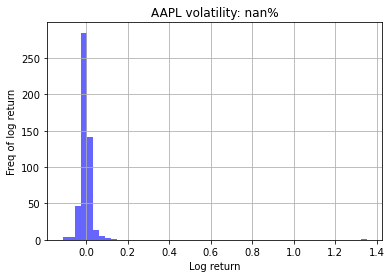

In [295]:
volatility = calc_volatility(df_apple, '2019-01-01', '2020-12-31', 252)
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df_apple['log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatility: ' + str_vol + '%')

In [297]:
volatility = calc_volatility(df_apple, '2019-01-01', '2020-12-31', 252)
str_vol = str(round(volatility, 4)*100)

fig = px.histogram(df_apple, x='log_returns', title='AAPL volatility: ' + str_vol + '%')

fig.show()